NEUTRINO SOURCE CANDIDATES WITHIN 5.4 DEGREES OF: RA 358.3 DEC 1.6

Catalog & Name       RA (deg)    DEC (deg)    Flux (ergs/cm2/s)  Type of Source
-----------------  ----------  -----------  -------------------  ------------------------
3FGL J2344.4+0549     356.103        5.831          9.17523e-13  AGN / active galaxy
3FGL J2338.7+0251     354.694        2.857          8.60642e-13  unknown gamma ray source
3FGL J0006.2+0135       1.572        1.585          7.66034e-13  unknown gamma ray source
3FGL J2357.3-0150     359.35        -1.844          7.61588e-13  blazar


Note: The given flux value is energy flux. Size of plotted indicators increases with flux.


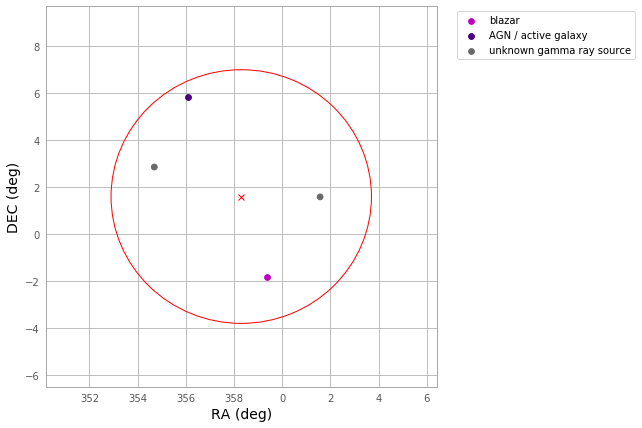

<module 'matplotlib.pyplot' from '/Users/william/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [5]:
from astropy.io import fits
import argparse, sys, os, urllib.request
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from tabulate import tabulate

# The following parameters are set this way so that the legend 
# is not cut off when the program is run from a terminal:

#from matplotlib import rcParams     
#rcParams.update({'figure.subplot.right': 0.73})
#rcParams.update({'figure.subplot.left': 0.15})
#rcParams.update({'figure.subplot.top': 0.89})
#rcParams.update({'figure.subplot.bottom': 0.22})

# For running in ipython notebook (comment out otherwise):
%matplotlib inline

######################################

# This part not needed if running from ipython notebook
# When using ipython notebook, set RA, DEC, ERR manually

# We want the user to input the neutrino event's RA, DEC, and the radius of its error circle:

#parser = argparse.ArgumentParser()
#parser.add_argument('-r', '--RA', type = float, dest = 'RA', help = 'enter right ascension in degrees')
#parser.add_argument('-d', '--DEC', type = float, dest = 'DEC', help = 'enter declination in degrees')
#parser.add_argument('-e', '--ERR', type = float, dest = 'ERR', help = 'enter radius of the error circle in degrees')

#args = parser.parse_args()

# Limit acceptable values of RA and DEC. 
# It's possible to do this in argparse but I haven't found a good way yet.

#if not(0.0 <= args.RA <= 360.0):
#    print('Error: Right Ascension should be between 0 and 360 degrees')
#    sys.exit()
    
#if not(-90.0 <= args.DEC <= 90.0):
#    print('Error: Declination should be between -90 and 90 degrees')
#    sys.exit()

#if not(0.0 <= args.ERR <= 180.0):
#    print('Error: Error should be between 0 and 180 degrees')
#    sys.exit()

# Variables are easier to work with without the 'args.'

#RA = args.RA
#DEC = args.DEC
#ERR = args.ERR

######################################

# This function plots the error circle of the neutrino event

def ploterrcirc(RA, DEC, ERR, RA1, RA2, DEC1, DEC2):
   
    fig = plt.figure(1, figsize=(7, 7))
    plt.axis([RA1, RA2, DEC1, DEC2])
    ax = fig.add_subplot(1, 1, 1)
    errcirc = plt.Circle((RA, DEC), radius = ERR, color = 'r', fill = False)
    ax.add_patch(errcirc)

    ticks = ax.get_xticks()
    ticks[ticks > 359.9999] -= 360
    ax.set_xticklabels([int(tick) for tick in ticks])

    plt.xlabel('RA (deg)', fontsize = 14)
    plt.ylabel('DEC (deg)', fontsize = 14)

    plt.plot(RA, DEC, 'x', color = 'r')
    
######################################

# This function reads downloads and data from fits files and sorts the sources by type
# It is called once per catalog, and requires some fine tuning based on 
# which catalog is being read

def readfits(URL, file_name, RA, DEC, RA1, RA2, DEC1, DEC2, ERR, marker):
    # Check if the catalog exists already. If not, download it from the website and save it:
    if(os.path.isfile(file_name) == False):
        urllib.request.urlretrieve(URL, file_name)
    
    # Read data from file:
    hdulist = fits.open(file_name)
    tbdata = hdulist[1].data
    names = tbdata.field(0)
    RAs = tbdata.field(1)
    DECs = tbdata.field(2)
    if(marker == '3FGL'):
        classes = tbdata.field(73)
        flux = tbdata.field(19)
    if(marker == '2FHL'):
        classes = tbdata.field(34)
        flux = tbdata.field(15)
        
    RAs[RAs < RA1] += 360
        
    # We want to only plot sources that are within the error circle:
    for i in range(len(names)):
        if(((RAs[i] - RA) ** 2 + (DECs[i] - DEC) ** 2) > (ERR ** 2)):
        #if not((RA1 <= RAs[i] <= RA2) and (DEC1 <= DECs[i] <= DEC2)):
            names[i] = 'bad'
            RAs[i] = 1000.0
            DECs[i] = 1000.0
            classes[i] = 'bad'
            flux[i] = -15.0
            
    names = list(filter(lambda a: a != 'bad', names))
    RAs = list(filter(lambda a: a < 900.0, RAs))
    DECs = list(filter(lambda a: a < 900.0, DECs))
    classes = list(filter(lambda a: a != 'bad', classes))
    flux = list(filter(lambda a: a > 0.0, flux))
    
    srctype = np.zeros(len(names), dtype = '52str')
    
    if not 'psrRA' in globals():
        global psrRA, psrDEC, psrflux
        psrRA, psrDEC, psrflux = [], [], []
    if not 'pwnRA' in globals():
        global pwnRA, pwnDEC, pwnflux
        pwnRA, pwnDEC, pwnflux = [], [], []
    if not 'snrRA' in globals():
        global snrRA, snrDEC, snrflux
        snrRA, snrDEC, snrflux = [], [], []
    if not 'sppRA' in globals():
        global sppRA, sppDEC, sppflux
        sppRA, sppDEC, sppflux = [], [], []          
    if not 'hmbRA' in globals():
        global hmbRA, hmbDEC, hmbflux
        hmbRA, hmbDEC, hmbflux = [], [], []    
    if not 'bzrRA' in globals():
        global bzrRA, bzrDEC, bzrflux
        bzrRA, bzrDEC, bzrflux = [], [], []
    if not 'rdgRA' in globals():
        global rdgRA, rdgDEC, rdgflux
        rdgRA, rdgDEC, rdgflux = [], [], [] 
    if not 'gclRA' in globals():
        global gclRA, gclDEC, gclflux
        gclRA, gclDEC, gclflux = [], [], []
    if not 'agnRA' in globals():
        global agnRA, agnDEC, agnflux
        agnRA, agnDEC, agnflux = [], [], []
    if not 'binRA' in globals():
        global binRA, binDEC, binflux
        binRA, binDEC, binflux = [], [], []
    if not 'sfrRA' in globals():
        global sfrRA, sfrDEC, sfrflux
        sfrRA, sfrDEC, sfrflux = [], [], []
    if not 'galRA' in globals():
        global galRA, galDEC, galflux
        galRA, galDEC, galflux = [], [], []
    if not 'rgbRA' in globals():
        global rgbRA, rgbDEC, rgbflux
        rgbRA, rgbDEC, rgbflux = [], [], []
    if not 'seyRA' in globals():
        global seyRA, seyDEC, seyflux
        seyRA, seyDEC, seyflux = [], [], []
    if not 'novRA' in globals():
        global novRA, novDEC, novflux
        novRA, novDEC, novflux = [], [], []
    if not 'glcRA' in globals():
        global glcRA, glcDEC, glcflux
        glcRA, glcDEC, glcflux = [], [], []
    if not 'qsrRA' in globals():
        global qsrRA, qsrDEC, qsrflux
        qsrRA, qsrDEC, qsrflux = [], [], []
    if not 'sbgRA' in globals():
        global sbgRA, sbgDEC, sbgflux
        sbgRA, sbgDEC, sbgflux = [], [], []
    if not 'unkRA' in globals():
        global unkRA, unkDEC, unkflux
        unkRA, unkDEC, unkflux = [], [], []

    for i in range(len(names)):
        if((classes[i] == 'psr') or (classes[i] == 'PSR')):
            srctype[i] = 'pulsar'
            psrRA.append(RAs[i])
            psrDEC.append(DECs[i])
            psrflux.append(flux[i])
        elif(classes[i] == 'pwn'):
            srctype[i] = 'psr wind nebula'
            pwnRA.append(RAs[i])
            pwnDEC.append(DECs[i])
            pwnflux.append(flux[i])
        elif(classes[i] == 'snr'):
            srctype[i] = 'SNR'
            snrRA.append(RAs[i])
            snrDEC.append(DECs[i])
            snrflux.append(flux[i])
        elif(classes[i] == 'spp'):
            srctype[i] = 'SNR/PWN'
            sppRA.append(RAs[i])
            sppDEC.append(DECs[i])
            sppflux.append(flux[i])
        elif(classes[i] == 'hmb'):
            srctype[i] = 'high-mass binary'
            hmbRA.append(RAs[i])
            hmbDEC.append(DECs[i])
            hmbflux.append(flux[i])
        elif(classes[i] == 'bin'):
            srctype[i] = 'binary'
            binRA.append(RAs[i])
            binDEC.append(DECs[i])
            binflux.append(flux[i])
        elif(classes[i] == 'sfr'):
            srctype[i] = 'star-forming region'
            sfrRA.append(RAs[i])
            sfrDEC.append(DECs[i])
            sfrflux.append(flux[i])
        elif((classes[i] == 'bll') or (classes[i] == 'bll-g') or (classes[i] == 'fsrq') or (classes[i] == 'bcu I') or (classes[i] == 'bcu II') or (classes[i] == 'bcu III')):
            srctype[i] = 'blazar'
            bzrRA.append(RAs[i])
            bzrDEC.append(DECs[i])
            bzrflux.append(flux[i])
        elif((classes[i] == 'agn') or (classes[i] == 'bcu')):
            srctype[i] = 'AGN / active galaxy'
            agnRA.append(RAs[i])
            agnDEC.append(DECs[i])
            agnflux.append(flux[i])
        elif(classes[i] == 'rdg'):
            srctype[i] = 'radio galaxy'
            rdgRA.append(RAs[i])
            rdgDEC.append(DECs[i])
            rdgflux.append(flux[i])
        elif(classes[i] == 'rdg/bll'):
            srctype[i] = 'radio galaxy / BL Lac blazar'
            rgbRA.append(RAs[i])
            rgbDEC.append(DECs[i])
            rgbflux.append(flux[i])
        elif(classes[i] == 'gal'):
            srctype[i] = 'normal galaxy (or part)'
            galRA.append(RAs[i])
            galDEC.append(DECs[i])
            galflux.append(flux[i])
        elif(classes[i] == 'galclu'):
            srctype[i] = 'galaxy cluster'
            gclRA.append(RAs[i])
            gclDEC.append(DECs[i])
            gclflux.append(flux[i])
        elif((classes[i] == 'nlsy1') or (classes[i] == 'sey')):
            srctype[i] = 'Seyfert galaxy'
            seyRA.append(RAs[i])
            seyDEC.append(DECs[i])
            seyflux.append(flux[i])
        elif(classes[i] == 'nov'):
            srctype[i] = 'nova'
            novRA.append(RAs[i])
            novDEC.append(DECs[i])
            novflux.append(flux[i])
        elif(classes[i] == 'glc'):
            srctype[i] = 'globular cluster'
            glcRA.append(RAs[i])
            glcDEC.append(DECs[i])
            glcflux.append(flux[i])
        elif((classes[i] == 'css') or (classes[i] == 'ssrq')):
            srctype[i] = 'quasar'
            qsrRA.append(RAs[i])
            qsrDEC.append(DECs[i])
            qsrflux.append(flux[i])
        elif(classes[i] == 'sbg'):
            srctype[i] = 'starburst galaxy'
            sbgRA.append(RAs[i])
            sbgDEC.append(DECs[i])
            sbgflux.append(flux[i])
        else:
            srctype[i] = 'unknown gamma ray source'
            unkRA.append(RAs[i])
            unkDEC.append(DECs[i])
            unkflux.append(flux[i])
    
    # Here, we will make sure that these arrays won't be overwritten next time the function is called with a different catalog
    # Also, by setting the new arrays as global variables, we can then use them later in the program
    
    if (marker == '3FGL'):
        global names3FGL
        global RAs3FGL
        global DECs3FGL
        global classes3FGL
        global flux3FGL
        global srctype3FGL
        names3FGL = names
        RAs3FGL = RAs
        DECs3FGL = DECs
        classes3FGL = classes
        flux3FGL = flux
        srctype3FGL = srctype
    if (marker == '2FHL'):
        global names2FHL
        global RAs2FHL
        global DECs2FHL
        global classes2FHL
        global flux2FHL
        global srctype2FHL
        names2FHL = names
        RAs2FHL = RAs
        DECs2FHL = DECs
        classes2FHL = classes
        flux2FHL = flux
        srctype2FHL = srctype
    if (marker == 'TEV'):
        global namesTEV
        global RAsTEV
        global DECsTEV
        global classesTEV
        global fluxTEV
        global srctypeTEV
        namesTEV = names
        RAsTEV = RAs
        DECsTEV = DECs
        classesTEV = classes
        fluxTEV = flux
        srctypeTEV = srctype
        
######################################

# This function plots the source candidates and color codes them based on type

def plotsrcs(psrRA, psrDEC, pwnRA, pwnDEC, snrRA, snrDEC, sppRA, sppDEC, hmbRA, hmbDEC, binRA, binDEC, sfrRA, sfrDEC, bzrRA, bzrDEC, agnRA, agnDEC, rdgRA, rdgDEC, rgbRA, rgbDEC, galRA, galDEC, gclRA, gclDEC, seyRA, seyDEC, novRA, novDEC, glcRA, glcDEC, qsrRA, qsrDEC, sbgRA, sbgDEC, unkRA, unkDEC):
    
    if(psrRA != []):
        plt.scatter(psrRA, psrDEC, c = 'b', s = np.multiply(psrflux, 10 ** 13) + 25, label = 'pulsar')
    if(pwnRA != []):
        plt.scatter(pwnRA, pwnDEC, c = 'lavender', s = np.multiply(pwnflux, 10 ** 13) + 25, label = 'psr wind nebula')
    if(snrRA != []):
        plt.scatter(snrRA, snrDEC, c = 'darkred', s = np.multiply(snrflux, 10 ** 13) + 25, label = 'supernova remnant')
    if(sppRA != []):
        plt.scatter(sppRA, sppDEC, c = 'g', s = np.multiply(sppflux, 10 ** 13) + 25, label = 'SNR or PWN')
    if(hmbRA != []):
        plt.scatter(hmbRA, hmbDEC, c = 'r', s = np.multiply(hmbflux, 10 ** 13) + 25, label = 'high-mass binary')
    if(binRA != []):
        plt.scatter(binRA, binDEC, c = 'pink', s = np.multiply(binflux, 10 ** 13) + 25, label = 'binary')
    if(sfrRA != []):
        plt.scatter(sfrRA, sfrDEC, c = 'c', s = np.multiply(sfrflux, 10 ** 13) + 25, label = 'star-forming region')
    if(bzrRA != []):
        plt.scatter(bzrRA, bzrDEC, c = 'm', s = np.multiply(bzrflux, 10 ** 13) + 25, label = 'blazar')
    if(agnRA != []):
        plt.scatter(agnRA, agnDEC, c = 'indigo', s = np.multiply(agnflux, 10 ** 13) + 25, label = 'AGN / active galaxy')
    if(rdgRA != []):
        plt.scatter(rdgRA, rdgDEC, c = 'lime', s = np.multiply(rdgflux, 10 ** 13) + 25, label = 'radio galaxy')
    if(rgbRA != []):
        plt.scatter(rgbRA, rgbDEC, c = 'aqua', s = np.multiply(rgbflux, 10 ** 13) + 25, label = 'radio galaxy / BL Lac blazar')
    if(galRA != []):    
        plt.scatter(galRA, galDEC, c = 'y', s = np.multiply(galflux, 10 ** 13) + 25, label = 'galaxy')
    if(gclRA != []):
        plt.scatter(gclRA, gclDEC, c = 'k', s = np.multiply(gclflux, 10 ** 13) + 25, label = 'galaxy cluster')
    if(seyRA != []):
        plt.scatter(seyRA, seyDEC, c = 'tan', s = np.multiply(seyflux, 10 ** 13) + 25, label = 'Seyfert galaxy')
    if(novRA != []):
        plt.scatter(novRA, novDEC, c = 'w', s = np.multiply(novflux, 10 ** 13) + 25, label = 'nova')
    if(glcRA != []):
        plt.scatter(glcRA, glcDEC, c = 'black', s = np.multiply(glcflux, 10 ** 13) + 25, label = 'globular cluster')
    if(qsrRA != []):
        plt.scatter(qsrRA, qsrDEC, c = 'darkviolet', s = np.multiply(qsrflux, 10 ** 13) + 25, label = 'quasar')
    if(sbgRA != []):
        plt.scatter(sbgRA, sbgDEC, c = 'maroon', s = np.multiply(sbgflux, 10 ** 13) + 25, label = 'starburst galaxy')
    if(unkRA != []):    
        plt.scatter(unkRA, unkDEC, c = 'dimgray', s = np.multiply(unkflux, 10 ** 13) + 25, label = 'unknown gamma ray source')
    if((psrRA != []) or (pwnRA != []) or (snrRA != []) or (sppRA != []) or (hmbRA != []) or (binRA != []) or (sfrRA != []) or (bzrRA != []) or (agnRA != []) or (rdgRA != []) or (rgbRA != []) or (galRA != []) or (gclRA != []) or (seyRA != []) or (novRA != []) or (glcRA != []) or (qsrRA != []) or (sbgRA != []) or (unkRA != [])):
        plt.legend(bbox_to_anchor = (1.04, 1), loc = "upper left")
        
######################################

# This function outputs a table onto the command line listing the sources
# inside the error circle, along with their coordinates, name, type, and flux.

def printout(RA, DEC, ERR, names3FGL, names2FHL, RAs3FGL, RAs2FHL, DECs3FGL, DECs2FHL, flux3FGL, flux2FHL, srctype3FGL, srctype2FHL):    
    names = np.append(names3FGL, names2FHL)
    RAs = np.append(RAs3FGL, RAs2FHL)
    RAs[RAs > 360] -= 360
    RAs = np.around(RAs, decimals = 3)
    DECs = np.append(DECs3FGL, DECs2FHL)
    DECs = np.around(DECs, decimals = 3)
    flux = np.append(flux3FGL, flux2FHL)
    srctype = np.append(srctype3FGL, srctype2FHL)
    
    table = np.zeros(len(names), '20str, f, f, f, 30str')
    
    headers = ('Catalog & Name', 'RA (deg)', 'DEC (deg)', 'Flux (ergs/cm2/s)', 'Type of Source')
    for i in range(len(names)):
        table[i] = (names[i], RAs[i], DECs[i], flux[i], srctype[i])
    
    # Sort by flux
    
    table = np.sort(table.view('20str, f, f, f, 30str'), order = ['f3'], axis = 0)[::-1].view()
    
    
    
    print('NEUTRINO SOURCE CANDIDATES WITHIN', ERR, 'DEGREES OF: RA', RA, 'DEC', DEC)
    print('')
    print(tabulate(table, headers))
    print('')
    if(len(table) == 0):
        print('NO SOURCES FOUND WITHIN ERROR CIRCLE')
    if(len(table) != 0):
        print('')
        print('Note: The given flux value is energy flux. Size of plotted indicators increases with flux.')
######################################
######################################

# This part is for manual input. Should be commented out if 
# it is intended to use command-line input from a terminal.

RA = 358.3
DEC = 1.6
ERR = 5.4

if not(0.0 <= RA <= 360.0):
    print('Error: Right Ascension should be between 0 and 360 degrees')
    sys.exit()
    
if not(-90.0 <= DEC <= 90.0):
    print('Error: Declination should be between -90 and 90 degrees')
    sys.exit()

if not(0.0 <= ERR <= 180.0):
    print('Error: Error should be between 0 and 180 degrees')
    sys.exit()

######################################

# Set the boundaries of the figure to be 1.5x the size of the error circle
    
RA1 = RA - 1.5 * ERR
RA2 = RA + 1.5 * ERR
DEC1 = DEC - 1.5 * ERR
DEC2 = DEC + 1.5 * ERR

######################################

ploterrcirc(RA, DEC, ERR, RA1, RA2, DEC1, DEC2)
readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/gll_psc_v16.fit', './3FGLCat.fit', RA, DEC, RA1, RA2, DEC1, DEC2, ERR, '3FGL')
readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2FHL/gll_psch_v09.fit', './2FHLCat.fit', RA, DEC, RA1, RA2, DEC1, DEC2, ERR, '2FHL')
#readfits('', './TEVCat.fit', RA, DEC, ERR, 'TEV')
printout(RA, DEC, ERR, names3FGL, names2FHL, RAs3FGL, RAs2FHL, DECs3FGL, DECs2FHL, flux3FGL, flux2FHL, srctype3FGL, srctype2FHL)

plotsrcs(psrRA, psrDEC, pwnRA, pwnDEC, snrRA, snrDEC, sppRA, sppDEC, hmbRA, hmbDEC, binRA, binDEC, sfrRA, sfrDEC, bzrRA, bzrDEC, agnRA, agnDEC, rdgRA, rdgDEC, rgbRA, rgbDEC, galRA, galDEC, gclRA, gclDEC, seyRA, seyDEC, novRA, novDEC, glcRA, glcDEC, qsrRA, qsrDEC, sbgRA, sbgDEC, unkRA, unkDEC)

plt.show()



plt